In [1]:
pip install tensorflow keras numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [20]:
# Define paths
train_dir = 'E:\\web'
validation_dir = 'E:\\web'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=20,
                                                              class_mode='categorical')


Found 4116 images belonging to 18 classes.
Found 4116 images belonging to 18 classes.


In [24]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),  # Define the input shape here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [26]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50)


C:\Users\Ronith\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.1054 - loss: 2.7304

C:\Users\Ronith\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 567ms/step - accuracy: 0.1055 - loss: 2.7294 - val_accuracy: 0.1940 - val_loss: 2.4515
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 577ms/step - accuracy: 0.1979 - loss: 2.3549 - val_accuracy: 0.4280 - val_loss: 1.8234
Epoch 3/20
  6/100 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.2815 - loss: 2.0997

C:\Users\Ronith\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.2989 - loss: 2.0035 - val_accuracy: 0.3430 - val_loss: 1.8910
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 584ms/step - accuracy: 0.4085 - loss: 1.7008 - val_accuracy: 0.3520 - val_loss: 1.9269
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.4511 - loss: 1.4503 - val_accuracy: 0.5345 - val_loss: 1.3354
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5843 - loss: 1.2136 - val_accuracy: 0.4900 - val_loss: 1.4593
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 569ms/step - accuracy: 0.6202 - loss: 1.0206 - val_accuracy: 0.6540 - val_loss: 0.9219
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 583ms/step - accuracy: 0.7011 - loss: 0.7649 - val_accuracy: 0.7340 - val_loss: 0.6584
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.7179 - loss: 0.8131 - val_accuracy: 0.7110 - val_loss: 0.8978
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.7568 - loss: 0.6379 - va

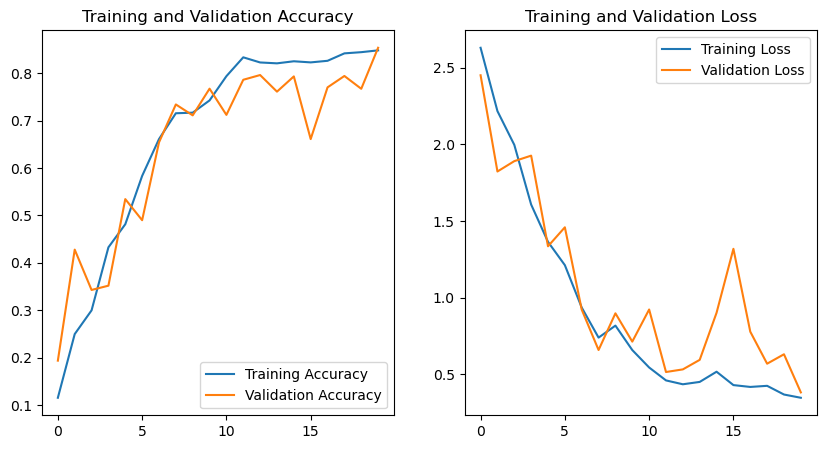

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [30]:
model.save('constellation_model.h5')


In [34]:
from tensorflow.keras.models import load_model

model = load_model('constellation_model.h5')


In [38]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (150, 150))  # Resize to the target size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match input shape
    return image


In [46]:
# Path to the test image
test_image_path = 'C:\\Users\\Ronith\\Downloads\\Cancer.webp'
# Preprocess the image
test_image = preprocess_image(test_image_path)

# Make a prediction
prediction = model.predict(test_image)

# Get the class label with the highest probability
predicted_class = np.argmax(prediction, axis=1)
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: [12]


In [48]:
# Assuming you have this dictionary from your training data
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Print the predicted label
predicted_label = class_labels[predicted_class[0]]
print("Predicted Constellation:", predicted_label)


Predicted Constellation: augmented_images_lyra
